In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
train.shape

(60000, 785)

In [5]:
test.shape

(10000, 785)

In [6]:
train_images = np.asarray(train.drop('label', axis=1))
train_label = np.asarray(train['label'])

test_images = np.asarray(test.drop('label', axis=1))
test_label = np.asarray(test['label'])

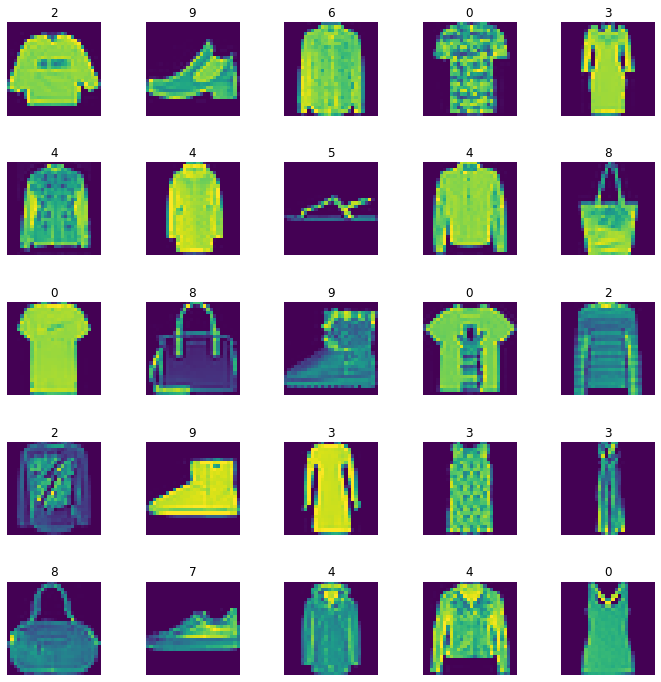

In [18]:
fig, axes = plt.subplots(5,5, figsize=(12, 12))
axes= axes.ravel()
for i in range(25):
        axes[i].imshow(train_images[i].reshape(28, 28))
        axes[i].set_title(train_label[i])
        axes[i].axis("off")
plt.subplots_adjust(hspace=0.5)

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
train_images = np.reshape(train_images, (-1, 28, 28, 1))
test_images = np.reshape(test_images, (-1, 28, 28, 1)) 

In [21]:
# Split the data into train and val data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images, train_label, test_size=0.2, random_state=42)

In [22]:
from keras.layers import Conv2D, MaxPooling2D , Flatten, Dense
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6999 - accuracy: 0.7447
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4905 - accuracy: 0.8198
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4448 - accuracy: 0.8375
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4199 - accuracy: 0.8450
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4013 - accuracy: 0.8534


In [24]:
score= model.evaluate(x_val, y_val, verbose=0)
print(score[1]*100)

85.23333072662354


In [36]:
import numpy as np
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 0s 1ms/step


In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.72      0.75      1000
           3       0.90      0.85      0.88      1000
           4       0.70      0.85      0.77      1000
           5       0.94      0.95      0.95      1000
           6       0.66      0.55      0.60      1000
           7       0.94      0.87      0.91      1000
           8       0.94      0.97      0.96      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

